Data Shape: (13, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LevelOfViolence  13 non-null     int64  
 1   CriticsRating    13 non-null     float64
 2   Watched          13 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes
Data Information: None
Data Description:        LevelOfViolence  CriticsRating    Watched
count        13.000000      13.000000  13.000000
mean          2.615385       3.138462  -0.230769
std           1.445595       1.267898   1.012739
min           1.000000       1.200000  -1.000000
25%           1.000000       2.100000  -1.000000
50%           3.000000       3.000000  -1.000000
75%           3.000000       4.200000   1.000000
max           5.000000       4.900000   1.000000
Unique Values in Watched: [-1  1]
   LevelOfViolence  CriticsRating  Watched
0                1            1.2 

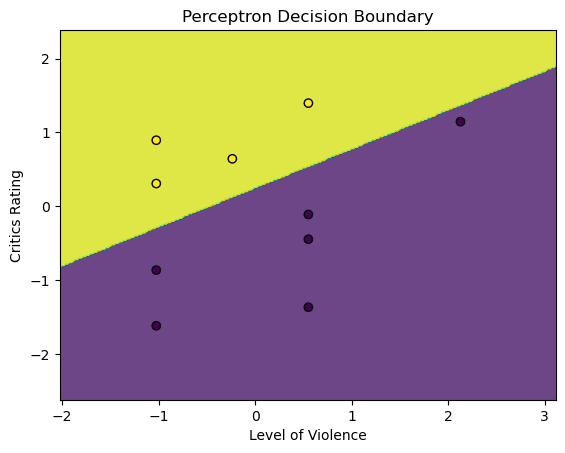

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/movieData.csv')
print(f'Data Shape: {df.shape}')
print(f'Data Information: {df.info()}')
print(f'Data Description: {df.describe()}')
print(f'Unique Values in Watched: {df['Watched'].unique()}')
print(df.head())

# Split the data into features and target
# Features (independent variables)
X = df[['LevelOfViolence', 'CriticsRating']]

# Target (dependent variable)
y = df['Watched']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the training data
X_test_scaled = scaler.transform(X_test) # Transform the testing data

# Train the Perceptron model
pla2 = Perceptron(max_iter=50, random_state=123)
pla2.fit(X_train_scaled, y_train) # Fit the model to the training data

# Evaluate the model
y_pred = pla2.predict(X_test_scaled) # Predict the test data
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Number of iterations: {pla2.n_iter_}")
print(f"Intercept: {pla2.intercept_}")
print(f"Final Weights/Coeffients: {pla2.coef_}")
print(f"Coeficient Shape: {pla2.coef_.shape}")

# Plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(f"xx shape: {xx.shape}")
print(f"yy shape: {yy.shape}")

# Predict the function value for the whole grid
Z = pla2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8) # Contour plot background and the BDL (filled with colors)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o') # Scatter points
plt.title('Perceptron Decision Boundary')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
# plt.legend()
plt.show()

In [3]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Number of iterations: {pla2.n_iter_}")
print(f"Intercept: {pla2.intercept_}")
print(f"Final Weights/Coeffients: {pla2.coef_}")
print(f"Coeficient Shape: {pla2.coef_.shape}")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Number of iterations: 10
Intercept: [-1.]
Final Weights/Coeffients: [[-2.1278981   4.04173487]]
Coeficient Shape: (1, 2)


xx shape: (255, 258)
yy shape: (255, 258)


/var/folders/nh/cfqgdp9s0l396qrmcg1jl29c0000gn/T/ipykernel_9824/839420160.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing set') # Scatter points for testing set


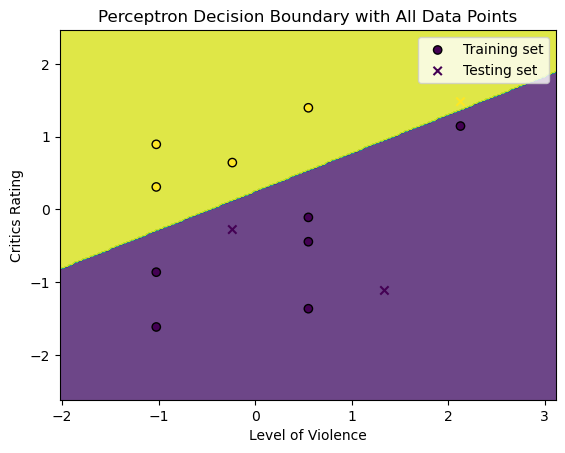

In [4]:
# Combine the scaled training and testing data
X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

# Plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_combined_scaled[:, 0].min() - 1, X_combined_scaled[:, 0].max() + 1
y_min, y_max = X_combined_scaled[:, 1].min() - 1, X_combined_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(f"xx shape: {xx.shape}")
print(f"yy shape: {yy.shape}")

# Predict the function value for the whole grid
Z = pla2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and all data points
plt.contourf(xx, yy, Z, alpha=0.8) # Contour plot background and the BDL (filled with colors)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', label='Training set') # Scatter points for training set
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing set') # Scatter points for testing set
plt.title('Perceptron Decision Boundary with All Data Points')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.legend()
plt.show()

/opt/anaconda3/envs/DataScienceStudy/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/var/folders/nh/cfqgdp9s0l396qrmcg1jl29c0000gn/T/ipykernel_9824/3616234753.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['LevelOfViolence'], X_test['CriticsRating'], c=y_test, edgecolors='k', marker='x', label='Testing set')  # Testing data


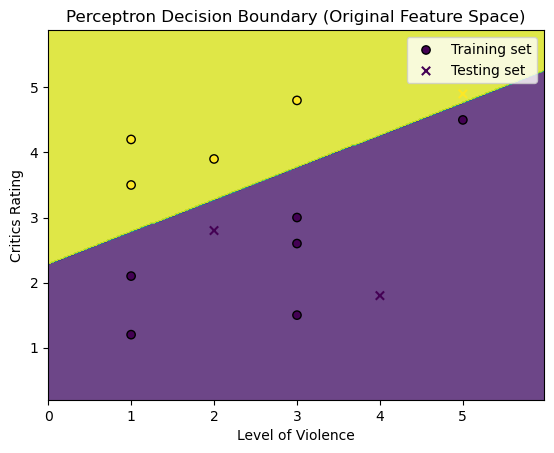

In [5]:
# Create a mesh grid in the original feature space
h = 0.02  # Step size in the mesh
x_min, x_max = X['LevelOfViolence'].min() - 1, X['LevelOfViolence'].max() + 1
y_min, y_max = X['CriticsRating'].min() - 1, X['CriticsRating'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Scale the mesh grid points using the same scaler
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)

# Predict the class labels for the scaled mesh grid points
Z = pla2.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points in the original feature space
plt.contourf(xx, yy, Z, alpha=0.8)  # Decision boundary
plt.scatter(X_train['LevelOfViolence'], X_train['CriticsRating'], c=y_train, edgecolors='k', marker='o', label='Training set')  # Training data
plt.scatter(X_test['LevelOfViolence'], X_test['CriticsRating'], c=y_test, edgecolors='k', marker='x', label='Testing set')  # Testing data
plt.title('Perceptron Decision Boundary (Original Feature Space)')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.legend()
plt.show()